<a href="https://colab.research.google.com/github/prgmr99/machine_learning-sklearn/blob/main/sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [436]:
import warnings
warnings.filterwarnings('ignore') # 불필요한 경고 출력 방지

# **0.데이터 셋**

sklearn.dataset에서 제공해주는 다양한 샘플 데이터 활용
iris 데이터 셋을 활용해보자.

### **0-1. iris 데이터 셋**

Mission: 꽃 종류 분류하기

In [437]:
# iris 데이터 셋
from sklearn.datasets import load_iris

In [438]:
# iris 데이터 셋 로드
iris=load_iris()

**iris 데이터 셋 구성(key values):**


*   DESCR: 데이터 셋의 정보를 보여줌
*   data: feature data
*   feature_names: feature data의 컬럼 이름
*   target: label data(수치형)
*   target_names: label data의 value 이름(문자형)


In [439]:
# 데이터 셋 정보 확인하기
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [440]:
# data 불러오기
data=iris['data']
data # 총 150개 있다.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [441]:
# feature names 확인하기
feature_names=iris['feature_names']
feature_names

# sepal: 꽃 받침; petal: 꽃잎

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [442]:
# label data 확인하기
target=iris['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [443]:
# target names 확인하기
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### **0-2. 데이터프레임 만들기**

In [444]:
# feature data 먼저 생성하기
df_iris=pd.DataFrame(data,columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [445]:
# target column 추가하기
df_iris['target']=target
df_iris.head() # 최종 dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **0-3. 시각화로 데이터셋 파악하기**

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
# Sepal data로 보는 꽃 종류
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

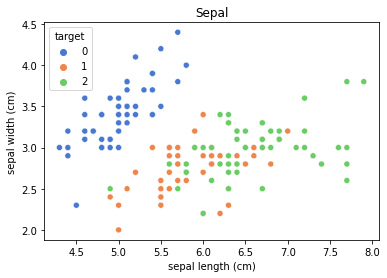

In [448]:
sns.scatterplot('sepal length (cm)', 'sepal width (cm)', hue='target', palette='muted',data=df_iris)
plt.title('Sepal')
plt.show()

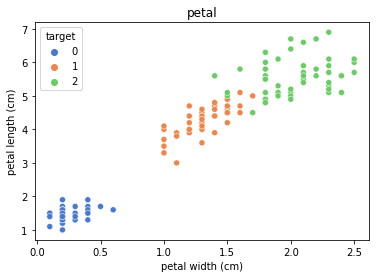

In [449]:
# petal data로 보는 꽃 종류
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted',data=df_iris)
plt.title('petal')
plt.show()

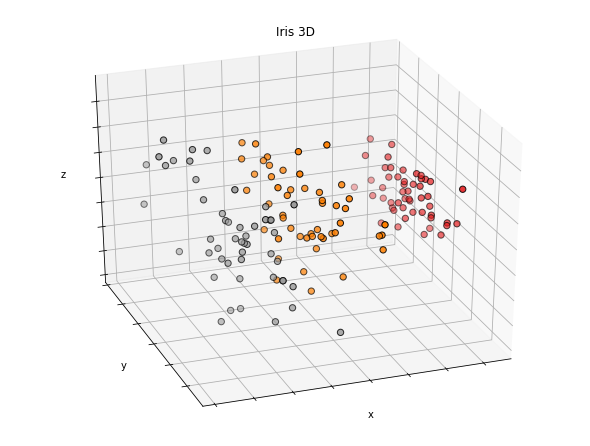

In [450]:
# 3D plot으로 보는 꽃 종류 (PCA 이용)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig=plt.figure(figsize=(8,6))
ax=Axes3D(fig,elev=-150,azim=110)
X_reduced=PCA(n_components=3).fit_transform(df_iris.drop('target',1))
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=df_iris['target'],
           cmap=plt.cm.Set1,edgecolor='k',s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

# **1. training set/validation set 나누기**

In [451]:
from sklearn.model_selection import train_test_split

# 데이터를 적절히 분리하기 위해서는 train_test_split() 함수를 사용해야한다.
# 이는 값을 나눠서 반환하는 함수이다.

In [452]:
x_train,x_valid,y_train,y_valid=train_test_split(df_iris.drop('target',1),df_iris['target'])
# x_train, x_valid에는 feature 데이터 4개의 컬럼만 들어가야 하니, 
# 'target'컬럼(axis=1)을 지워주는 drop()함수 사용

# x_train, x_valid에는 4개의 feature 데이터가 들어가고
# y_train,y_valid에는 1개(target)의 데이터가 들어간다. 

x_train, x_valid = feature 데이터

y_train, y_valid = label 데이터

x_train(feature 데이터)와 y_train(target 데이터)은 학습(훈련) 데이터로 쓰일 데이터이고,

x_valid(feature 데이터)와 y_valid(target 데이터)는 예측 데이터로 쓰일 데이터이다.

x_train, y_train에는 df_iris.drop('target',1)이 분배

x_valid, y_valid에는 df_iris['target']이 분배된다.

In [453]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [454]:
x_valid.shape,y_valid.shape

((38, 4), (38,))

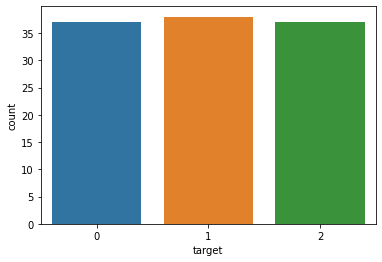

In [455]:
sns.countplot(y_train)

'target'값이 0,1,2인 데이터가 Original dataset으로부터 랜덤으로 뽑히기 때문에 **비율의 차이가 존재**할 수 있다. 따라서 기계학습할 때, **sample size가 큰 데이터 위주로 학습**하여 **모델의 예측성능이 떨어질** 수 있다.

위 상황에서, 학습된 머신러닝 모델이 sample size가 큰 target=1인 경우를 좀 더 잘 예측하고, target=2에 대한 예측도가 떨어질 수 있다.

이를 방지하기 위해 우리는 **stratify 옵션**을 이용하여 **label의 class 분포를 균등하게 배분**한다.

In [456]:
x_train,x_valid,y_train,y_valid=train_test_split(df_iris.drop('target',1),df_iris['target'],stratify=df_iris['target'])
# stratify 옵션을 넣지않으면 위의 막대그래프는 실행시킬 때마다 변한다.

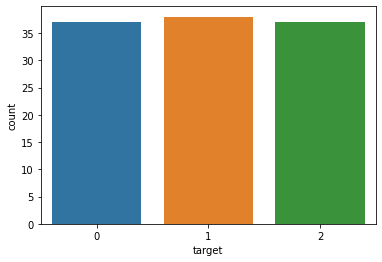

In [457]:
sns.countplot(y_train)

In [458]:
# 먼저 x_train은 4개의 feature이고, (80%)
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8
16,5.4,3.9,1.3,0.4
103,6.3,2.9,5.6,1.8
52,6.9,3.1,4.9,1.5
74,6.4,2.9,4.3,1.3
...,...,...,...,...
115,6.4,3.2,5.3,2.3
10,5.4,3.7,1.5,0.2
28,5.2,3.4,1.4,0.2
90,5.5,2.6,4.4,1.2


In [459]:
# x_valid는 또 4개의 feature이다. (20%)
x_valid

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
14,5.8,4.0,1.2,0.2
114,5.8,2.8,5.1,2.4
108,6.7,2.5,5.8,1.8
101,5.8,2.7,5.1,1.9
29,4.7,3.2,1.6,0.2
5,5.4,3.9,1.7,0.4
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3
11,4.8,3.4,1.6,0.2


In [460]:
# y_train에는 'target'컬럼만 (80%)
y_train

123    2
16     0
103    2
52     1
74     1
      ..
115    2
10     0
28     0
90     1
85     1
Name: target, Length: 112, dtype: int64

In [461]:
# y_valid에도 'target'컬럼만 (20%)
y_valid

145    2
14     0
114    2
108    2
101    2
29     0
5      0
39     0
55     1
11     0
122    2
95     1
6      0
128    2
79     1
7      0
46     0
89     1
62     1
137    2
33     0
146    2
47     0
68     1
118    2
92     1
3      0
54     1
97     1
126    2
127    2
104    2
51     1
13     0
59     1
87     1
131    2
36     0
Name: target, dtype: int64

# **2. 하이퍼 파라미터(hyper-parameter) 튜닝**

모델 학습할 때, 설정한 옵션들은 **하이퍼 파라미터(hyper-parameter)**라고 한다.

설정한 값에 따라 모델 성능도 달라질 수 있다.

각 알고리즘 별, hyper-parameter의 종류가 매우 다양하다. 

다음 두 가지 parameter는 기본적으로 설정해주는 것이 좋다.

*   random_state: sampling seed 설정(항상 동일하게 sampling 하기)
*   n_jobs=-1: CPU를 모두 사용(학습속도가 빠름)



# **3. 분류 알고리즘**

### **3-1. Logistic Regression**

Logistic Regression, SVM(Support Vector Machine)과 같은 알고리즘은 이진(Binary Class) 분류만 가능하다. (2개의 클래스 판별만 가능하다.)

하지만, 3개 이상의 클래스에 대한 판별 [다중 클래서(Multi-Class)분류]을 진행하는 경우, 다음과 같은 전략으로 판별한다.

*   **one-vs-one(OvO)**: K개의 클래스가 존재할 때, 이 중 2개의 클래스 조합을 선택하여 K(K-1)/2 개의 이진 클래스 분류 문제를 풀고 이진판별을 통해 가장 많은 판별값을 얻은 클래스를 선택하는 방법이다.
*   **one-vs-rest(OvR)**: K개의 클래스가 존재할 때, 클래스들을 "k번째 클래스(one)" & "나머지(rest)"로 나누어서 K개의 개별 이진 분류 문제를 푼다. 즉, 각각의 클래스에 대해 표본이 속하는지(y=1) 속하지 않는지(y=0)의 이진 분류 문제를 푸는 것이다. OvO와 달리 클래스 수만큼의 이진 분류 문제를 풀면 된다.

대부분 OvsR 전략을 선호한다.



In [462]:
from sklearn.linear_model import LogisticRegression

In [463]:
# step 1: 모델 선언
lr=LogisticRegression(random_state=0)

In [464]:
# step 2: 모델 학습
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [465]:
# step 3: 예측
prediction=lr.predict(x_valid)

In [466]:
prediction[:5]

array([2, 0, 2, 2, 2])

In [467]:
# step 4: 평가
(prediction==y_valid).mean() # 정확도

# 정확도는 1에 가까울수록 좋다.

1.0

### **3-2. SGD(SGDClassifier)**

**Stochastic Gradient descent(SGD): 확률적 경사 하강법**

In [468]:
from IPython.display import Image

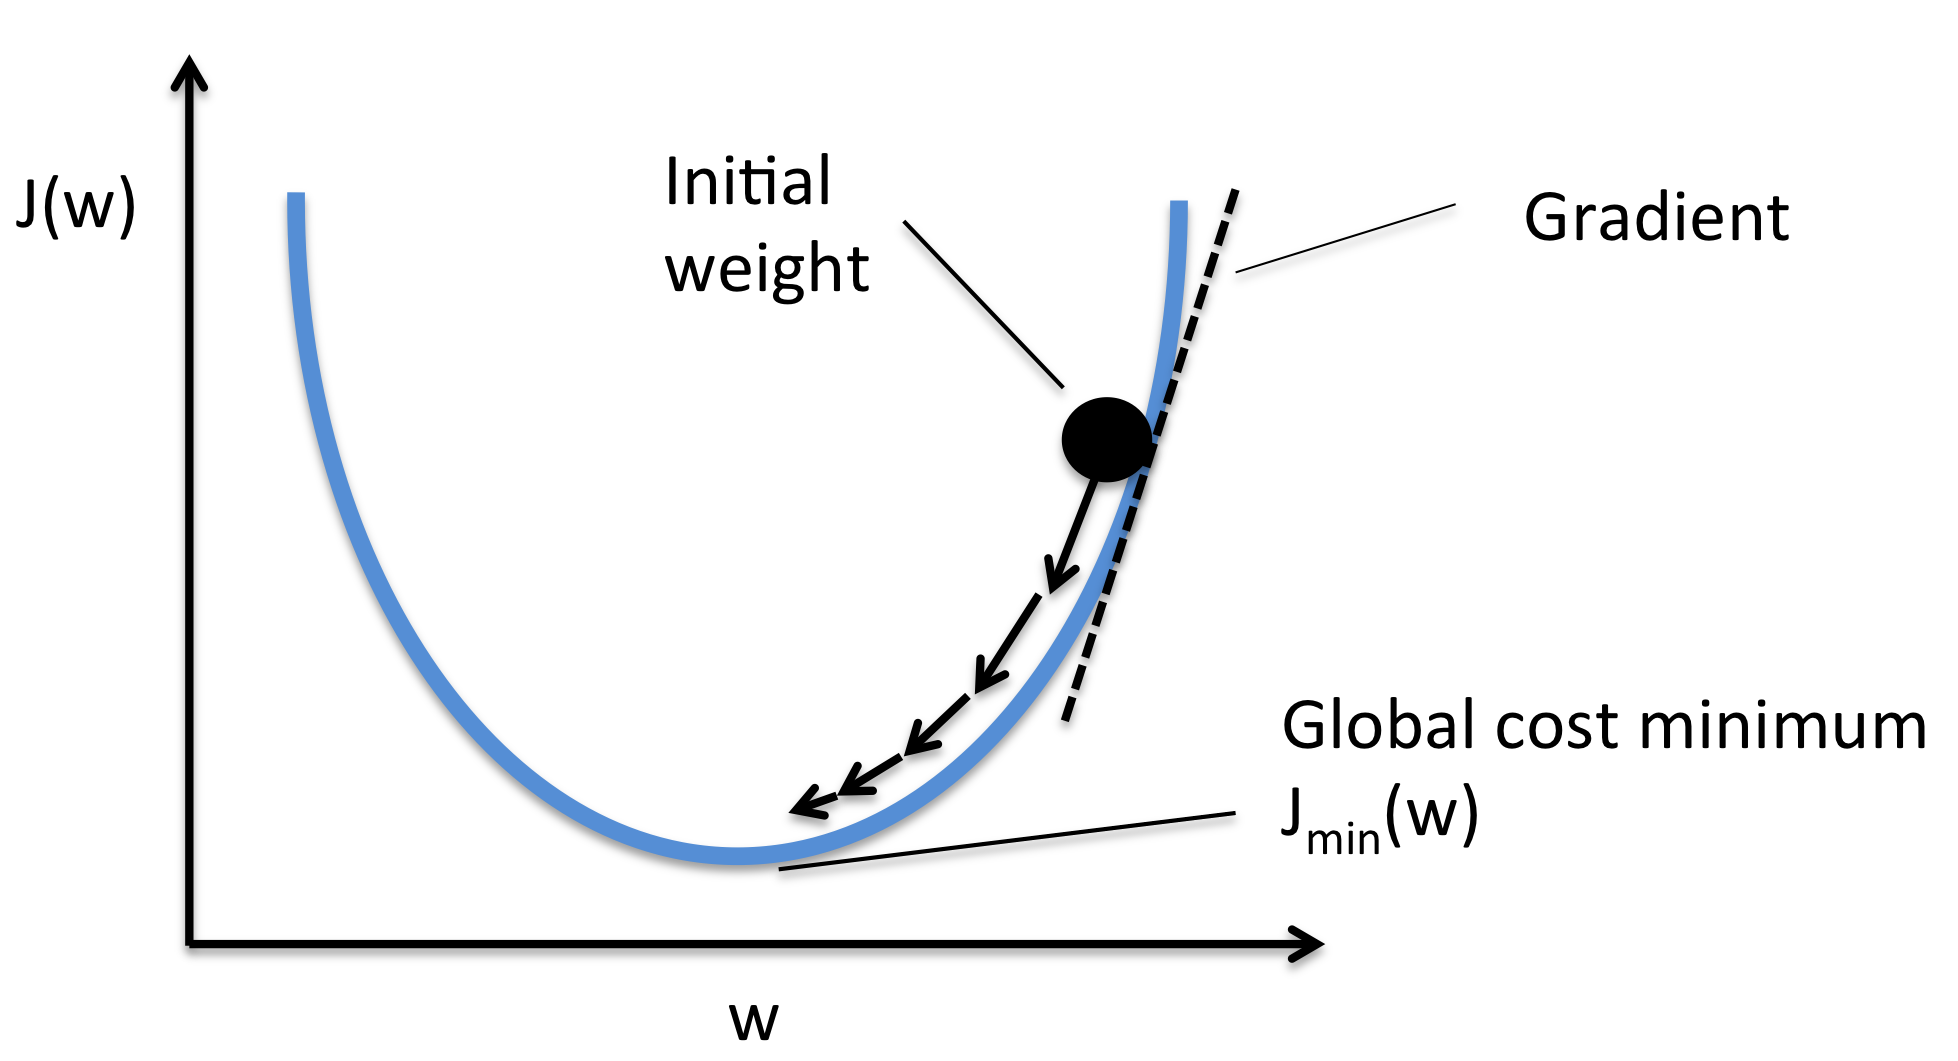

In [469]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [470]:
from sklearn.linear_model import SGDClassifier

In [471]:
# step 1: 모델 선언
sgd=SGDClassifier(random_state=0)

In [472]:
# step 2: 모델 학습
sgd.fit(x_train,y_train)

SGDClassifier(random_state=0)

In [473]:
# step 3: 예측
prediction=sgd.predict(x_valid)

In [474]:
(prediction==y_valid).mean()

0.868421052631579

In [475]:
# Change hyper-parameter values:
# e.g.: penalty='l1', random_state=1, n_jobs=-1
sgd2=SGDClassifier(penalty='l1',random_state=1,n_jobs=-1)

In [476]:
sgd2.fit(x_train,y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=1)

In [477]:
prediction2=sgd2.predict(x_valid)

In [482]:
prediction2 # 예측값들은 모두 prediction2에 저장된다.

array([2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2,
       0, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0])

In [485]:
(prediction2==y_valid).mean() # 정확도가 향상된 것을 확인할 수 있다.

1.0

In [488]:
# 성능 검사, 이렇게도 할 수 있다.
from sklearn.metrics import accuracy_score
print("정답률: ", accuracy_score(y_valid,prediction2))

# 예측 데이터인 x_valid를 넣어서 예측한 결과값과 y_valid(예측 결과 데이터로 주어졌던)가
# 일치하는지 비교하여 정답률을 출력해보자.
# sklearn.metrics 모듈의 accuracy_score() 함수를 사용한다.

정답률:  1.0


### **3-3. KNN(KNeighborsClassifier)**

KNN(K Nearest Neighbors): K 최근접 이웃 알고리즘

새로운 데이터의 분류 결과가 K개 최근접 이웃의 클래스에 의해서 결정되며, 데이터는 가장 많이 할당되는 클래스로 분류하게 된다.

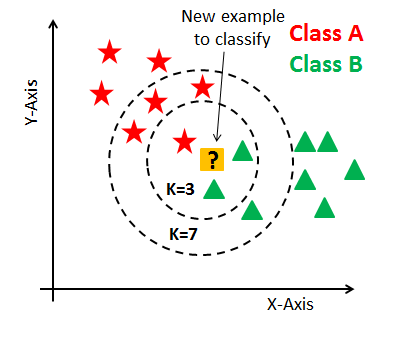

In [480]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [489]:
from sklearn.neighbors import KNeighborsClassifier

In [490]:
# step 1: 모델 선언
knn=KNeighborsClassifier()

In [491]:
# step 2: 모델 학습
knn.fit(x_train,y_train) # default: n_neighbors=5

KNeighborsClassifier()

In [492]:
# step 3: 예측
prediction=knn.predict(x_valid)

In [493]:
# step 4: 평가
(prediction==y_valid).mean()

1.0

In [494]:
accuracy_score(y_valid,prediction)

1.0

### **3-4. SVM (SVC)**


*   새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다.
*   경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘



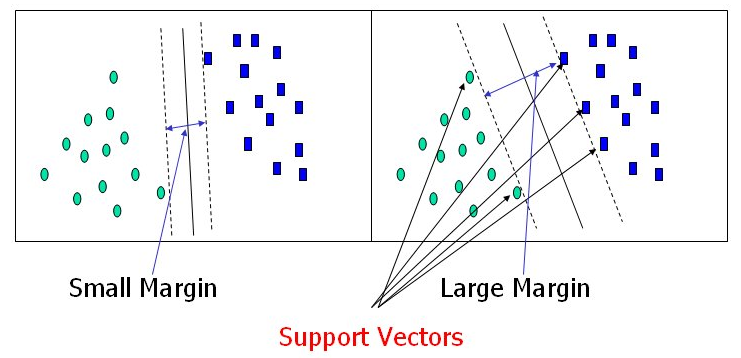

In [495]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

SVM은 Logistic Regression과 같이 이진 분류만 가능하다. (2개의 클래스 판별만 가능)

3개 이상의 클래스인 경우: **OvsR 전략** 사용

In [496]:
from sklearn.svm import SVC 
# SVC: Support Vector Classification

In [498]:
# step 1: 모델 선언
svc=SVC(random_state=0)

In [499]:
# step 2: 모델 학습
svc.fit(x_train,y_train)

SVC(random_state=0)

In [504]:
# step 3: 예측
svc_prediction=svc.predict(x_valid)

In [502]:
svc # hyper-parameter 확인

# colab에서는 출력하면 나오지 않기 때문에 import 선언할 때 SVC에 마우스 커서를 놓으면
# 튜닝할 수 있는 요소들을 확인할 수 있다.

SVC(random_state=0)

In [506]:
# step 4: 평가
(svc_prediction==y_valid).mean()

0.9736842105263158

각 클래스 별 확률값을 return 해주는 decision_function()

In [512]:
svc.decision_function(x_valid)
# []안에서 확률이 클수록 어느 target에 포함되어 있는지 알 수 있다.
# [-0.23434096,  1.09273856,  2.22154431]는 target 2라는 의미이다.
# 그래서 아래의 코드의 결과를 보면 첫 번째가 2라는 것을 확인할 수 있다.

array([[-0.23434096,  1.09273856,  2.22154431],
       [ 2.23622204,  1.12873402, -0.25126566],
       [-0.23983915,  1.10847109,  2.22520986],
       [-0.236148  ,  1.01264482,  2.23501775],
       [-0.24027962,  1.16351152,  2.20607378],
       [ 2.22808307,  1.14583294, -0.24883452],
       [ 2.2252978 ,  1.17389544, -0.25351371],
       [ 2.23164496,  1.15063952, -0.25208275],
       [-0.22657916,  2.22703928,  0.9955546 ],
       [ 2.23015542,  1.14613067, -0.25023407],
       [-0.21133015,  0.82271295,  2.24716256],
       [-0.2126305 ,  2.23616778,  0.86639089],
       [ 2.23444738,  1.11061383, -0.24714584],
       [-0.23840362,  1.02544624,  2.23611538],
       [-0.17369624,  2.24486535,  0.79105535],
       [ 2.23214377,  1.14551586, -0.25141152],
       [ 2.23232796,  1.14976838, -0.25234939],
       [-0.21441898,  2.23620274,  0.87133292],
       [-0.2124753 ,  2.2413881 ,  0.84517851],
       [-0.23607268,  1.11429485,  2.218605  ],
       [ 2.23576836,  1.1316612 , -0.251

In [513]:
svc_pred
# 확률값이 제일 높은 클래스로 분류(예측)된 것을 확인할 수 있다.

array([2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0])

### **3-5. Decision Tree (DecisionTreeClassifier)**

**1. Decision Tree(의사 결정 나무): 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것**

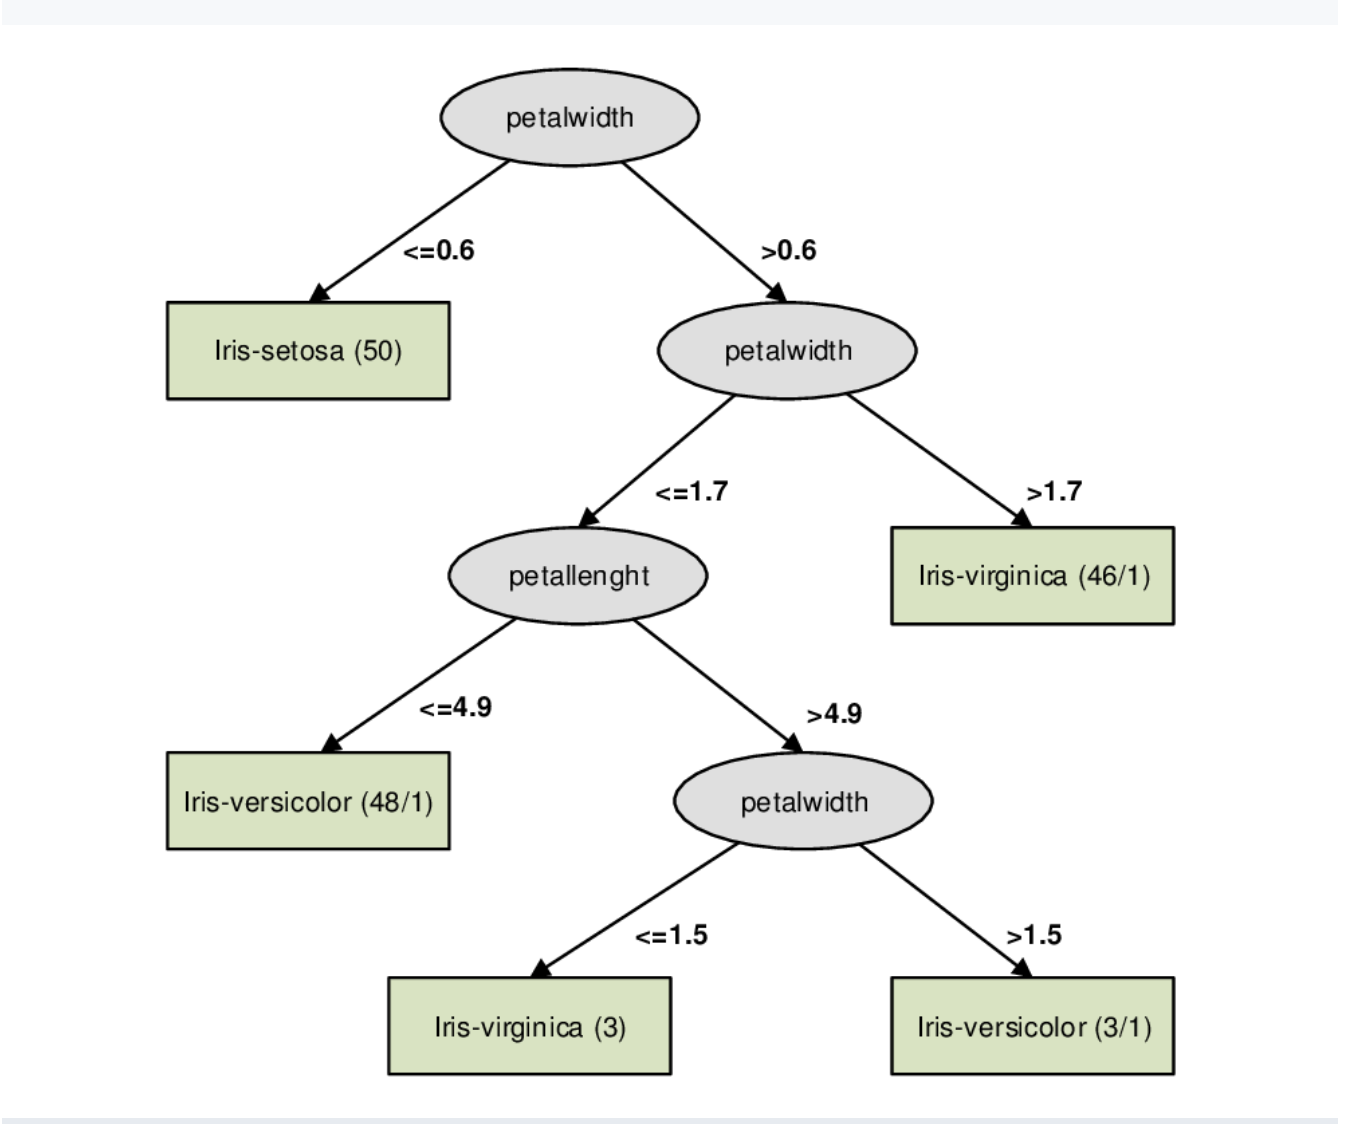

In [520]:
from sklearn.tree import DecisionTreeClassifier

In [521]:
# step 1: 모델 선언
dt=DecisionTreeClassifier()

In [522]:
# step 2: 모델 학습
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [523]:
# step 3: 모델 예측
dt_pred=dt.predict(x_valid)

In [525]:
# step 4: 평가
(dt_pred==y_valid).mean()

1.0

**2. Decision Tree 분류 결과 시각화**

In [534]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import numpy as np

In [537]:
# 방법 1: pydot을 사용하여 "dot 파일"을 "png 이미지"로 전환
# pip install pydot

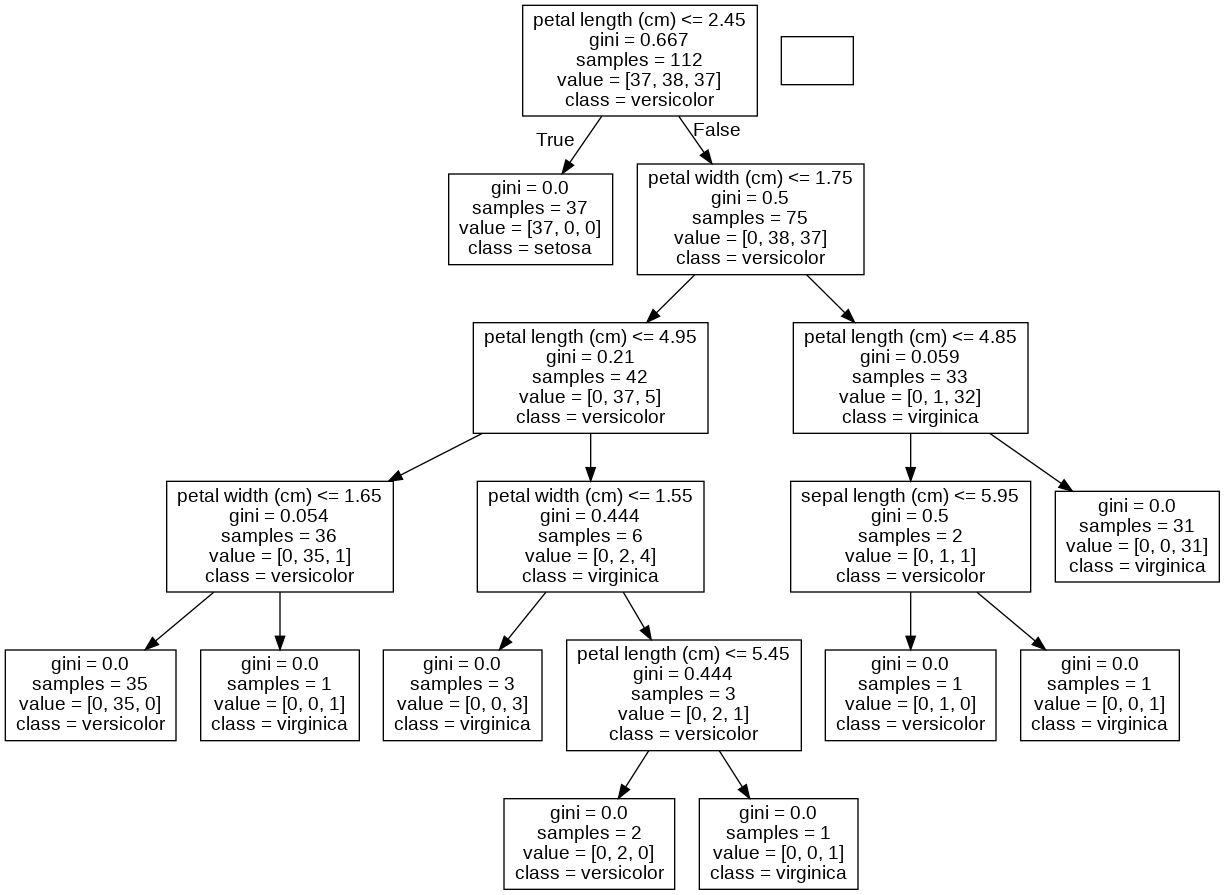

In [538]:
# 참고: https://niceman.tistory.com/169
import pydot

# .dot결과 생성
export_graphviz(dt, out_file='tree.dot', feature_names=feature_names, class_names=np.unique(iris['target_names']))

# Encoding
(graph,) = pydot.graph_from_dot_file('tree.dot', encoding='utf8')

# .dot파일을 .png이미지로 저장
graph.write_png('tree.png')

Image(filename = 'tree.png', width=600)

In [540]:
# 방법 2: graphviz.Source 이용
# pip install -U graphviz

In [541]:
import graphviz

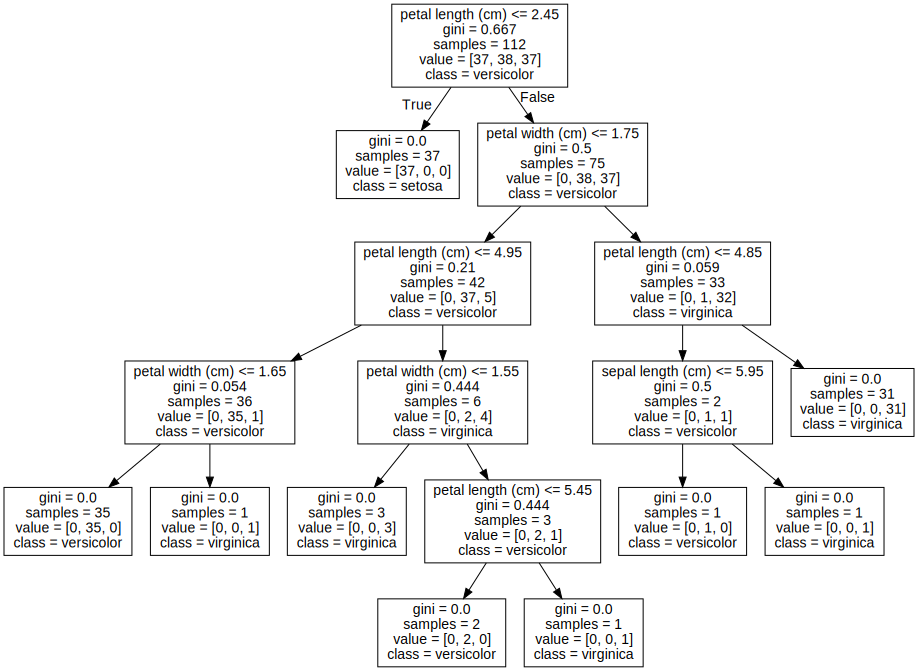

In [542]:
# 참고: https://www.kaggle.com/vaishvik25/titanic-eda-fe-3-model-decision-tree-viz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_dot = export_graphviz(dt,out_file=None, feature_names=feature_names, class_names=np.unique(iris['target_names']))
tree = graphviz.Source(tree_dot)
tree

**3. 가지 치기(pruning)**

overfitting을 방지하기 위해 적당히 가지 치기를 진행한다.

In [543]:
# 수동으로 max_depth 설정(parameter 튜닝)
# step 1: 모델 선언
dt2=DecisionTreeClassifier(max_depth=2)

In [544]:
# step 2: 모델 학습
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [545]:
# step 3: 예측
dt2_pred=dt2.predict(x_valid)

In [546]:
# step 4: 평가
(dt2_pred==y_valid).mean()

1.0

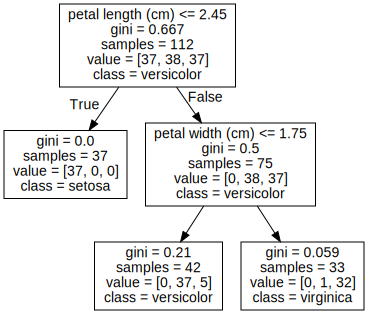

In [548]:
tree2_dot=export_graphviz(dt2,out_file=None, feature_names=feature_names, class_names=np.unique(iris['target_names']))
tree2=graphviz.Source(tree2_dot)
tree2